## Importing
We begin our project by importing the various libraries and datasets that will be required in our training and testing set. It is advisable to perform this action in a single cell at the top to avoid repeating this task multiple times. In this project, we will specifically be looking at the **iris dataset** from the **scikit-learn** library.

In [29]:
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.covariance import OAS
from sklearn import svm

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

import matplotlib.pyplot as plot
import numpy as np
from matplotlib.lines import Line2D

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [30]:
#loading the dataset
iris=datasets.load_iris(as_frame=True)
print(iris.data.shape)

print(list(iris))
print(iris['target_names'])

(150, 4)
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
['setosa' 'versicolor' 'virginica']


### Visualization of the Data
After loading the dataset, we can perform a principal component analysis on the data to visualize it. Since there are four features associated with each entry, we cannot create a 3D visualization of the data. Before applying PCA, we will also perform some preprocessing on the data to convert them into **zero mean** and **unit variance** data.

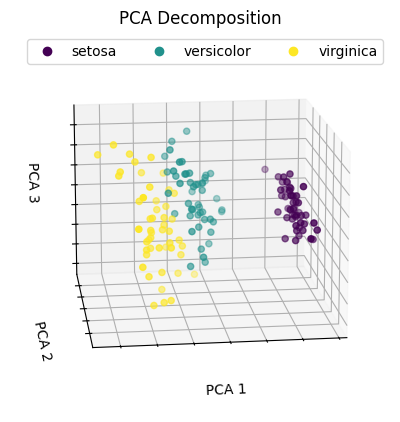

PCA 1 explains 72.962 % variance
PCA 2 explains 22.851 % variance
PCA 3 explains 3.669 % variance
Total variance explained: 99.482 %


In [31]:
scaler=StandardScaler()
scaled_iris=scaler.fit_transform(iris.data)

#performing PCA to generate 3 axes
pca=PCA(n_components=3)
iris_pca=pca.fit_transform(scaled_iris.data) 

fig=plot.figure(1,figsize=(4,6))
ax=fig.add_subplot(111,projection='3d',elev=15,azim=83)
ax.set_position([0,0,0.95,1])

scatter=ax.scatter(iris_pca[:, 0], iris_pca[:, 1], iris_pca[:, 2],c=iris.target)

ax.xaxis.set_ticklabels([])
ax.set_xlabel("PCA 1")
ax.yaxis.set_ticklabels([])
ax.set_ylabel("PCA 2")
ax.zaxis.set_ticklabels([])
ax.set_zlabel("PCA 3")
ax.set_title("PCA Decomposition")

#helper code to create legend
labels = [0,1,2] #target values 
handles = [plot.Line2D([],[],marker="o", ls="", color=scatter.cmap(scatter.norm(yi))) for yi in labels]
labels=list(iris['target_names'])
plot.legend(handles, labels,ncol=3)

plot.show()

i=1
for v in pca.explained_variance_ratio_:
    print("PCA",i,"explains",(round)(v*100,3),"% variance")
    i+=1

print("Total variance explained:",round(sum(pca.explained_variance_ratio_)*100,3),"%")


### Insights
Based on the visual depiction of the PCA decomposition shown above, it is possible to classify them mainly on the basis of PCA 1. The total variance captured by just PCA 1 and PCA 2 accounts for **over 95%** of the data and if need be, we can reduce the dimensionality of the original data from _**4** to **2**_.

## Using Logistic Regression
We will now attempt to classify the data using the approach of logistic regression. We will first begin by attempting to categorize them as **either belonging to a class or not**. We will then use the **softmax** approach to perform logistic regression for multiple classes. We will start with using all **four** features to classify a data point as either **virginica** or **not virginica**.

In [32]:

X=iris.data.values #obtaining the values for fitting
y=iris.target_names[iris.target] == 'virginica' #converting it into a target array of True or False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [33]:
scores = cross_val_score(log_reg, X, y, cv=6) #applying cross-validation
print("Mean score from cross-validation:",round(scores.mean()*100,2),"%")

score=log_reg.score(X_test,y_test)
print("Accuracy of model is:",round(score*100,2),"%")

Mean score from cross-validation: 96.67 %
Accuracy of model is: 100.0 %


### Interpretation
Given the relatively small number of data samples as well as the fact that this is a simple binary classification, we can expect a high accuracy as shown. We will now implement the **multinomial** method of logistic regression and check for the errors.

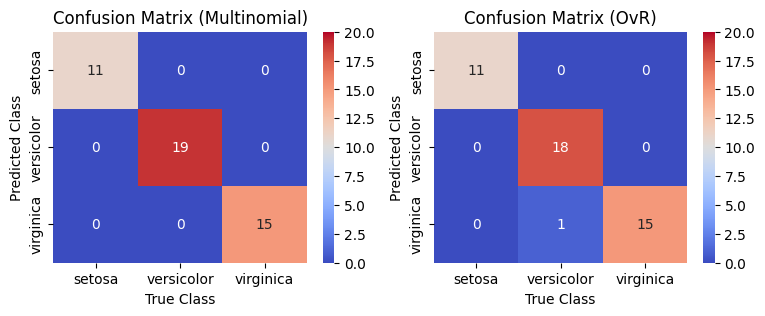

Accuracy from Logistic Regression using multinomial scheme: 100.0 %
Accuracy from Logistic Regression using an OvR scheme: 97.78 %


In [34]:
X=iris.data.values
y=iris.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=86)

logReg=LogisticRegression(random_state=86)
ovr=OneVsRestClassifier(logReg)
logReg.fit(X_train,y_train)
ovr.fit(X_train,y_train)

logRegPredict=logReg.predict(X_test)
ovrPredict=ovr.predict(X_test)
cm1=confusion_matrix(logRegPredict,y_test)
cm2=confusion_matrix(ovrPredict,y_test)
#create a Seaborn heatmap of the data

x_labels=y_labels=iris['target_names']
fig,ax=plot.subplots(1,2,figsize=(9,3))
sns.heatmap(cm1,cmap='coolwarm',annot=True,ax=ax[0],xticklabels=x_labels,yticklabels=y_labels,vmax=20,vmin=0)
ax[0].set_title("Confusion Matrix (Multinomial)")
ax[0].set_xlabel("True Class")
ax[0].set_ylabel("Predicted Class")
sns.heatmap(cm2,cmap='coolwarm',annot=True,ax=ax[1],xticklabels=x_labels,yticklabels=y_labels,vmax=20,vmin=0)
ax[1].set_title("Confusion Matrix (OvR)")
ax[1].set_xlabel("True Class")
ax[1].set_ylabel("Predicted Class")
plot.show()

sc1=logReg.score(X_test,y_test)
sc2=ovr.score(X_test,y_test)

print("Accuracy from Logistic Regression using multinomial scheme:",round(100*sc1,2),"%")
print("Accuracy from Logistic Regression using an OvR scheme:",round(100*sc2,2),"%")

### Interpretation
For the given data classes, we again find a very good **accuracy** and not many **misclassifications**. This is mainly due to the ease of classification that the iris dataset is known for. The confusion matrices have been visualized using a **Seaborn heatmap**.

## Linear and Quadratic Discriminant Analysis
We will now use the concepts of LDA and QDA to attempt to classify the data. They are based on the concept of **Bayes' Theorem** and involve calculation of **prior and posterior probabilities**. It is assumed that each data point belonging to a particular class is obtained from a **Gaussian distribution** within that class. The main difference between LDA and QDA is that LDA assumes a **common covariance matrix** for all the classes of data involved, whereas QDA computes a **separate covariance matrix** for each class. Additonally, to improve the calculation of the _covariance matrices_, we can perform _regularization_ on it using an improved **covariance estimation formula**. They are the **Ledoit-Wolf** and **Oracle Approximating Shrinkage (OAS)** estimates which help to minimize the **MSE criterion** feature optimally.

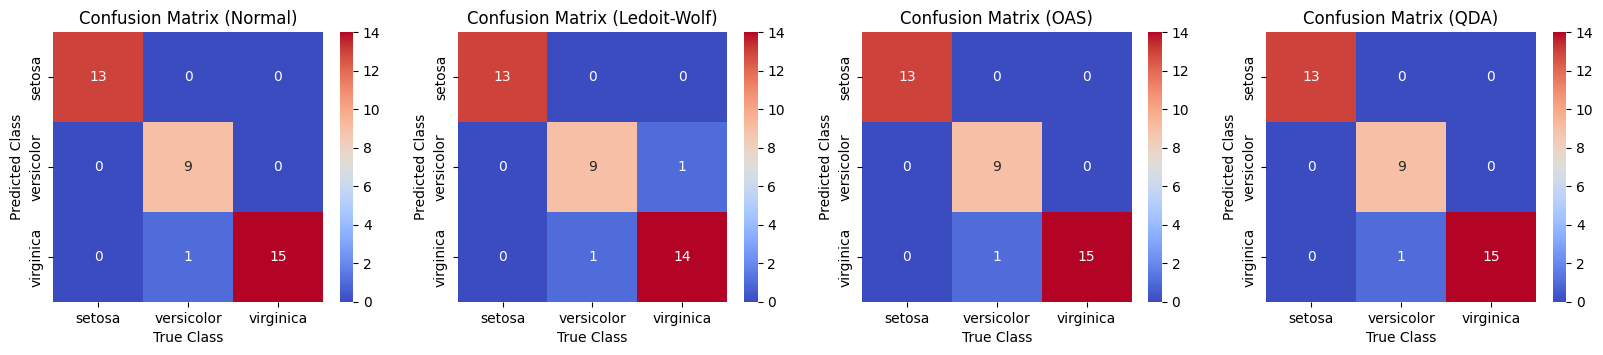

Accuracy from normal LDA: 97.37 %
Accuracy from LDA with Ledoit-Wolf optimization: 94.74 %
Accuracy from LDA with OAS optimization: 97.37 %
Accuracy from QDA: 97.37 %


In [35]:
X=iris.data.values
y=iris.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

lda1=LinearDiscriminantAnalysis(solver='lsqr',shrinkage=None).fit(X_train,y_train)
lda2=LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto').fit(X_train,y_train) #implements Ledoit-Wolf estimate
oas=OAS(store_precision=False, assume_centered=False)
lda3=LinearDiscriminantAnalysis(solver="lsqr", covariance_estimator=oas).fit(X_train,y_train)
qda=QuadraticDiscriminantAnalysis().fit(X_train,y_train)


cm1=confusion_matrix(lda1.predict(X_test),y_test)
cm2=confusion_matrix(lda2.predict(X_test),y_test)
cm3=confusion_matrix(lda3.predict(X_test),y_test)
cm4=confusion_matrix(qda.predict(X_test),y_test)

x_labels=y_labels=iris['target_names']
fig,ax=plot.subplots(1,4,figsize=(20,3.5))
sns.heatmap(cm1,cmap='coolwarm',annot=True,ax=ax[0],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=14)
ax[0].set_title("Confusion Matrix (Normal)")
ax[0].set_xlabel("True Class")
ax[0].set_ylabel("Predicted Class")
sns.heatmap(cm2,cmap='coolwarm',annot=True,ax=ax[1],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=14)
ax[1].set_title("Confusion Matrix (Ledoit-Wolf)")
ax[1].set_xlabel("True Class")
ax[1].set_ylabel("Predicted Class")
sns.heatmap(cm3,cmap='coolwarm',annot=True,ax=ax[2],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=14)
ax[2].set_title("Confusion Matrix (OAS)")
ax[2].set_xlabel("True Class")
ax[2].set_ylabel("Predicted Class")
sns.heatmap(cm4,cmap='coolwarm',annot=True,ax=ax[3],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=14)
ax[3].set_title("Confusion Matrix (QDA)")
ax[3].set_xlabel("True Class")
ax[3].set_ylabel("Predicted Class")
plot.show()

sc1=lda1.score(X_test,y_test)
sc2=lda2.score(X_test,y_test)
sc3=lda3.score(X_test,y_test)
sc4=qda.score(X_test,y_test)

print("Accuracy from normal LDA:",round(100*sc1,2),"%")
print("Accuracy from LDA with Ledoit-Wolf optimization:",round(100*sc2,2),"%")
print("Accuracy from LDA with OAS optimization:",round(100*sc3,2),"%")
print("Accuracy from QDA:",round(100*sc4,2),"%")



## Naive Bayes' Classification
In this classification method, we still follow Bayes' formula to calculate the posterior probability based on the prior probability. However, the crucial assumption in this stage is that we **assume** that all the features of the dataset are **independent of each other** and hence their probabilities can be **simply multiplied** together. This would lead us to the formulation of a _very fast_ classification system. However, in practice, it is quite rare that the predictors of a data are _truly independent_ of each other. In this cell, we have implemented a few different variants of the Naive Bayes' algorithm.
* **Gaussian**- In this variant, the priori probability of points belonging to a particular dataset are calculated considering that they come from a **Gaussian distribution**.
* **Bernoulli** - Here, the priori probability is calculated after assuming that the dataset belongs to a **Bernoulli distribution**. This requires _binarizing_ the inputs to this method and this would impose a heavy penalty if a particular dataset and feature combination is not present.
* **Multinomial** - Here, we assume that the priori probability is derived from a _multinomial_ distribution, which is an extension of _binomial distribution_ for more than two feature classes.
* **Categorical** - Here, we assume that the input features belong to a categorically distributed data - an extension of the _Bernoulli distribution_ for _more than 2_ possible outputs.

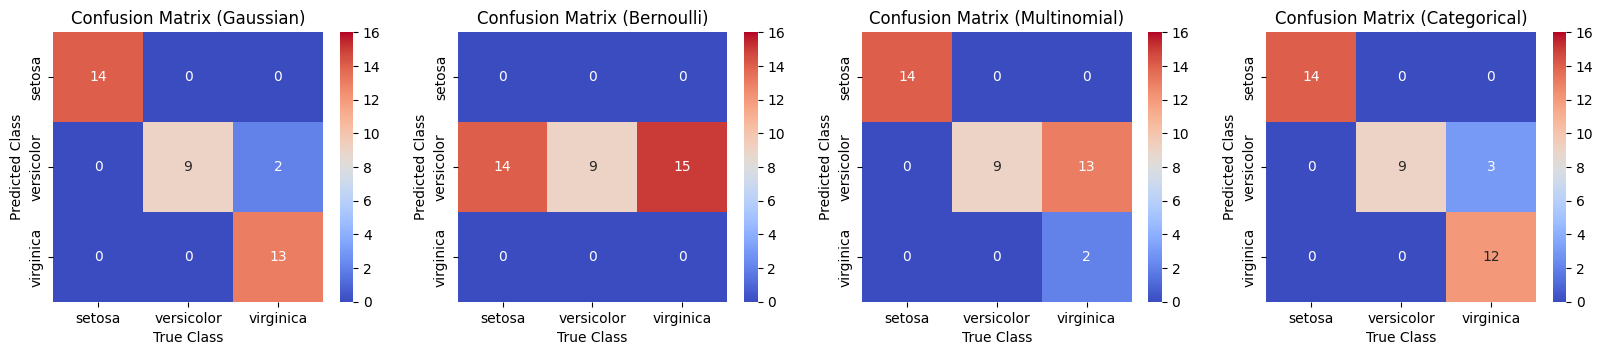

Accuracy from Gaussian distribution: 94.74 %
Accuracy from Bernoulli distribution: 23.68 %
Accuracy from Multinomial distribution: 65.79 %
Accuracy from Categorical distribution: 92.11 %


In [36]:
X=iris.data.values
y=iris.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

nb=GaussianNB().fit(X_train,y_train)
bnb=BernoulliNB().fit(X_train,y_train)
mnb=MultinomialNB().fit(X_train,y_train)
cnb=CategoricalNB().fit(X_train,y_train)

cm1=confusion_matrix(nb.predict(X_test),y_test)
cm2=confusion_matrix(bnb.predict(X_test),y_test)
cm3=confusion_matrix(mnb.predict(X_test),y_test)
cm4=confusion_matrix(cnb.predict(X_test),y_test)

x_labels=y_labels=iris['target_names']
fig,ax=plot.subplots(1,4,figsize=(20,3.5))
sns.heatmap(cm1,cmap='coolwarm',annot=True,ax=ax[0],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=16)
ax[0].set_title("Confusion Matrix (Gaussian)")
ax[0].set_xlabel("True Class")
ax[0].set_ylabel("Predicted Class")
sns.heatmap(cm2,cmap='coolwarm',annot=True,ax=ax[1],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=16)
ax[1].set_title("Confusion Matrix (Bernoulli)")
ax[1].set_xlabel("True Class")
ax[1].set_ylabel("Predicted Class")
sns.heatmap(cm3,cmap='coolwarm',annot=True,ax=ax[2],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=16)
ax[2].set_title("Confusion Matrix (Multinomial)")
ax[2].set_xlabel("True Class")
ax[2].set_ylabel("Predicted Class")
sns.heatmap(cm4,cmap='coolwarm',annot=True,ax=ax[3],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=16)
ax[3].set_title("Confusion Matrix (Categorical)")
ax[3].set_xlabel("True Class")
ax[3].set_ylabel("Predicted Class")
plot.show()

sc1=nb.score(X_test,y_test)
sc2=bnb.score(X_test,y_test)
sc3=mnb.score(X_test,y_test)
sc4=cnb.score(X_test,y_test)

print("Accuracy from Gaussian distribution:",round(100*sc1,2),"%")
print("Accuracy from Bernoulli distribution:",round(100*sc2,2),"%")
print("Accuracy from Multinomial distribution:",round(100*sc3,2),"%")
print("Accuracy from Categorical distribution:",round(100*sc4,2),"%")



### Interpretation
Given the accuracy of the predicted data, we can see that the Naive Bayes' classifier works best when assuming that the input features can be derived from a _Gaussian distribution_ or a _categorical distribution_.

## Support Vector Machines
Support Vector Machines are built on the concept of **Support Vector Classifiers**, which are in turn an extension of **maximal margin classifiers**. Maximal margin classifiers attempt to separate classes of data in _p dimensional space_ using a _p-1 dimensional hyperplane_ such that the _distance_ of the points from one class to the hyperplane is _as large_ as possible. However, in case of _overlaps_, such a separation is not possible. In that case, we allow for **soft margins**, wherein, we _deliberately_ allow for some **misclassifications** so that the predictions for the other data points is _quite accurate_. SVM extend the concept of SVC to allow for _more complicated decision boundaries_ using a **kernel function**, which can be **polynomial** or **exponential**. This allows the SVC to compute the hyperplane for the points _as if they reside in a higher dimensional space_ where a **boundary can be demarcated**. In the following cell, we perform classifications using these different types of SVMs.

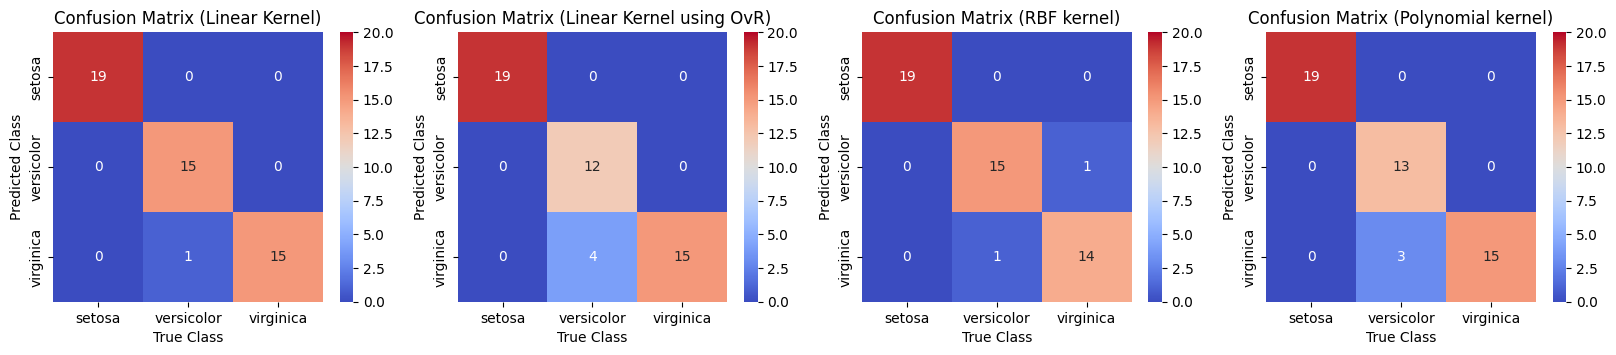

Accuracy from SVM with linear kernel: 98.0 %
Accuracy from Linear SVM using OvR scheme: 92.0 %
Accuracy from SVM using RBF kernel: 96.0 %
Accuracy from SVM using polynomial kernel: 94.0 %


In [37]:
X=iris.data.values
y=iris.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=92)

C = 1.0  # SVM regularization parameter, a measure of how many misclassifications are allowed
svm1=svm.SVC(kernel="linear", C=C).fit(X_train,y_train)
svm2=svm.LinearSVC(C=C, max_iter=10000).fit(X_train,y_train)
svm3=svm.SVC(kernel="rbf", gamma=0.45, C=C).fit(X_train,y_train)
#gamma is a measure of how far away a data point has influence on data points around it
svm4=svm.SVC(kernel="poly", degree=4, gamma="auto", C=C).fit(X_train,y_train)


cm1=confusion_matrix(svm1.predict(X_test),y_test)
cm2=confusion_matrix(svm2.predict(X_test),y_test)
cm3=confusion_matrix(svm3.predict(X_test),y_test)
cm4=confusion_matrix(svm4.predict(X_test),y_test)

x_labels=y_labels=iris['target_names']
fig,ax=plot.subplots(1,4,figsize=(20,3.5))
sns.heatmap(cm1,cmap='coolwarm',annot=True,ax=ax[0],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=20)
ax[0].set_title("Confusion Matrix (Linear Kernel)")
ax[0].set_xlabel("True Class")
ax[0].set_ylabel("Predicted Class")
sns.heatmap(cm2,cmap='coolwarm',annot=True,ax=ax[1],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=20)
ax[1].set_title("Confusion Matrix (Linear Kernel using OvR)")
ax[1].set_xlabel("True Class")
ax[1].set_ylabel("Predicted Class")
sns.heatmap(cm3,cmap='coolwarm',annot=True,ax=ax[2],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=20)
ax[2].set_title("Confusion Matrix (RBF kernel)")
ax[2].set_xlabel("True Class")
ax[2].set_ylabel("Predicted Class")
sns.heatmap(cm4,cmap='coolwarm',annot=True,ax=ax[3],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=20)
ax[3].set_title("Confusion Matrix (Polynomial kernel)")
ax[3].set_xlabel("True Class")
ax[3].set_ylabel("Predicted Class")
plot.show()

sc1=svm1.score(X_test,y_test)
sc2=svm2.score(X_test,y_test)
sc3=svm3.score(X_test,y_test)
sc4=svm4.score(X_test,y_test)

print("Accuracy from SVM with linear kernel:",round(100*sc1,2),"%")
print("Accuracy from Linear SVM using OvR scheme:",round(100*sc2,2),"%")
print("Accuracy from SVM using RBF kernel:",round(100*sc3,2),"%")
print("Accuracy from SVM using polynomial kernel:",round(100*sc4,2),"%")